In [16]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


%matplotlib inline

In [2]:
from constants import master_functionals_new_features_path, AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES

In [3]:
from nexa_preprocessing.normalization.functionals import within_subject_functional_normalization

In [4]:
df = pd.read_csv(master_functionals_new_features_path)
df

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,33.207450,0.188117,33.557415,35.970253,37.030464,3.473049,233.493740,237.09804,...,0,20.0,1.0,2,3.35,0.296667,1.0,1.0,0.0,0.0
1,1,0,31.973427,0.172323,24.031258,33.894035,36.294712,12.263454,36.486237,7.24742,...,1,80.0,1.0,2,2.46,0.395000,1.0,1.0,0.0,0.0
2,2,0,23.677464,0.129553,22.237234,23.013530,25.102104,2.864870,145.572220,159.39350,...,1,60.0,1.0,2,8.16,0.325217,5.0,1.0,0.0,0.0
3,3,0,33.611103,0.090990,33.551422,34.227577,34.913113,1.361690,123.937220,74.90742,...,1,100.0,2.0,2,0.92,0.090000,0.0,0.0,0.0,0.0
4,4,0,31.766670,0.110006,31.128075,31.511560,33.566906,2.438831,31.893764,36.00795,...,1,80.0,1.0,2,3.15,0.215000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,3332,0,20.228983,0.246194,14.451830,20.386751,26.042356,11.590527,245.911530,198.15411,...,1,80.0,1.0,2,8.35,0.381429,3.0,1.0,0.0,0.0
3333,3333,0,31.126240,0.114296,31.571873,32.327450,32.699960,1.128086,324.486900,250.81499,...,1,80.0,2.0,2,2.17,0.166667,0.0,0.0,0.0,0.0
3334,3334,0,29.766552,0.129714,29.915512,30.895258,31.772797,1.857285,259.278050,369.85800,...,1,100.0,1.0,1,2.61,0.174545,0.0,0.0,0.0,0.0
3335,3335,0,33.463300,0.230548,24.733616,36.905180,38.047897,13.314281,255.713210,0.00000,...,1,100.0,1.0,1,0.00,0.000000,0.0,0.0,0.0,0.0


In [5]:
participant_ids = df["participant"].values

df[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(df[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                        participant_ids,
                                                        "standard")

# Separate DataFrames based on accuracy
df_accuracy_0 = df[df['accuracy'] == 0]
df_accuracy_1 = df[df['accuracy'] == 1]

In [6]:
alpha = 0.05
p_values = {}
# col = "CumPauseLength"
# col = "MeanPauseSegmentLength"
# col = "PausesAbove0.5Sec"
# col = "PausesAbove1Sec"
# col = "PausesAbove1.5Sec"
col = "PausesAbove2Sec"


# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(df_accuracy_0[col],
                                           df_accuracy_1[col])

In [7]:
t_statistic

2.9555327102970677

In [8]:
p_value

0.003143160230295886

In [9]:
print("column {} has significant p-value".format(col))
print("printing means and stds")
print()
print("inaccurate:")
print(df_accuracy_0[col].mean())
print(df_accuracy_0[col].std())
print()
print("accurate means")
print(df_accuracy_1[col].mean())
print(df_accuracy_1[col].std())
print()

column PausesAbove2Sec has significant p-value
printing means and stds

inaccurate:
0.0856790720415433
1.074556623997155

accurate means
-0.02622349680488722
0.8761844267826334


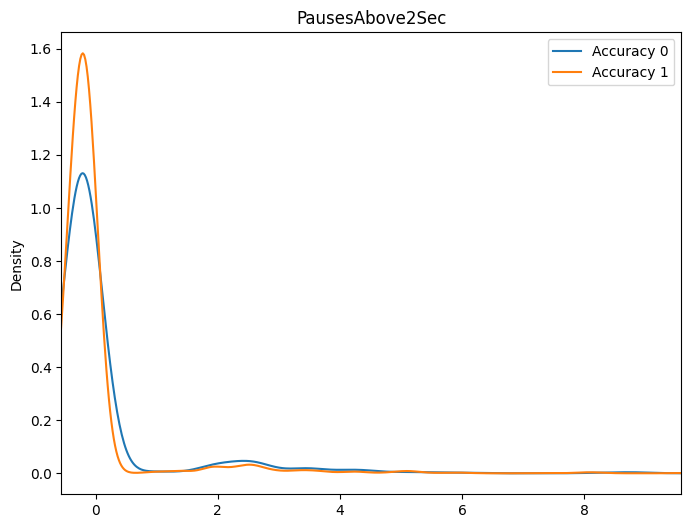

In [10]:
fig = plt.figure(figsize=(8, 6))

df_accuracy_0[col].plot(kind='density', label='Accuracy 0')

df_accuracy_1[col].plot(kind='density', label='Accuracy 1')

# Set x-axis limits to exclude areas with low density
plt.xlim(min(df[col]), max(df[col]))

plt.legend()  # Add legend

plt.ylabel('Density')
plt.title(col)

plt.show()

## Correlation Matrix

In [24]:
cols = ["CumPauseLength",
        "MeanPauseSegmentLength",
        "PausesAbove0.5Sec",
        "PausesAbove1Sec",
        "PausesAbove1.5Sec",
        "PausesAbove2Sec"]

corr_matrix = df[cols].corr()
corr_matrix

,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
CumPauseLength,1.000000,0.596592,0.741803,0.637508,0.512701,0.435620
MeanPauseSegmentLength,0.596592,1.000000,0.540661,0.584788,0.547179,0.507887
PausesAbove0.5Sec,0.741803,0.540661,1.000000,0.676472,0.428341,0.276695
PausesAbove1Sec,0.637508,0.584788,0.676472,1.000000,0.648837,0.451310
PausesAbove1.5Sec,0.512701,0.547179,0.428341,0.648837,1.000000,0.709019
PausesAbove2Sec,0.435620,0.507887,0.276695,0.451310,0.709019,1.000000


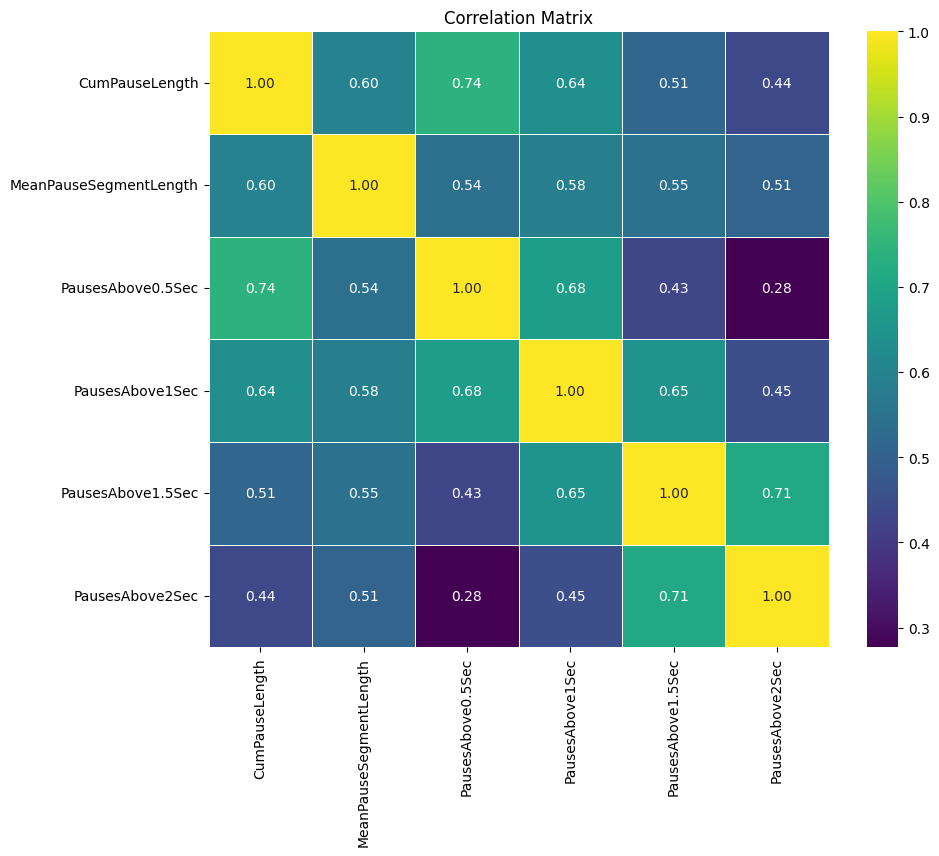

In [25]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

# Add labels and a title
plt.title('Correlation Matrix')
plt.show()

In [12]:
df

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,0.259983,0.332261,0.866330,0.506420,0.320359,-0.790661,0.054842,0.289241,...,0,20.0,1.0,2,0.112529,-0.079352,0.217061,0.942293,-0.490511,-0.429669
1,1,0,-0.717108,0.725696,-1.882271,-0.319202,-0.012434,1.862051,-0.836629,-0.675393,...,1,80.0,1.0,2,-0.077661,0.026350,0.220541,0.992432,-0.538028,-0.408248
2,2,0,-0.566677,-0.205434,-0.120069,-0.761264,-0.667896,-0.572266,0.024613,0.186602,...,1,60.0,1.0,2,4.495054,1.376780,6.037742,2.412091,-0.237356,0.000000
3,3,0,0.919177,-0.523623,1.150908,1.216159,0.367601,-0.741268,-0.271717,-0.377001,...,1,100.0,2.0,2,-0.566116,-0.630867,-0.715078,-0.456357,-0.313993,-0.232495
4,4,0,0.388853,-0.532196,0.628008,-0.127185,-0.194455,-0.701555,-0.916483,-0.569107,...,1,80.0,1.0,2,-0.254413,-0.349288,-0.095453,-0.621455,-0.502331,-0.443203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,3332,0,-0.450267,1.362586,-1.129102,-0.455241,0.339407,1.720947,0.798251,0.744770,...,1,80.0,1.0,2,2.070521,0.122313,1.659524,0.928705,-0.500835,-0.429669
3333,3333,0,-0.211937,-0.124017,0.559091,0.318900,-0.378290,-0.804033,0.598907,0.307612,...,1,80.0,2.0,2,0.043249,-0.200000,-0.715078,-0.456357,-0.313993,-0.232495
3334,3334,0,0.043278,-0.212633,0.459059,0.032353,-0.061197,-0.793500,0.414662,1.239616,...,1,100.0,1.0,1,0.373502,-0.246869,-0.653204,-0.551487,-0.313050,0.000000
3335,3335,0,-1.120744,1.811996,-2.040631,0.103935,0.535386,2.230362,0.452582,-0.727131,...,1,100.0,1.0,1,-0.915039,-0.673075,-0.428496,-0.256495,-0.111803,0.000000
